In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import pickle

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
color = sns.color_palette()
sns.set(rc={'figure.figsize':(12,8)})

import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [52]:
df=pd.read_csv('Cardata-Cleaned.csv',index_col=0)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 0 to 1049
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car Name       1050 non-null   object 
 1   Car url        1050 non-null   object 
 2   Car Brand      1050 non-null   object 
 3   Year           1050 non-null   int64  
 4   Selling Price  1050 non-null   float64
 5   Current Value  1050 non-null   float64
 6   KMs Driven     1050 non-null   int64  
 7   Fuel           1050 non-null   object 
 8   Seller Type    1050 non-null   object 
 9   max_power      1050 non-null   float64
 10  Transmission   1050 non-null   object 
 11  Owner          1050 non-null   object 
 12  Mileage        1050 non-null   float64
 13  Engine         1050 non-null   int64  
 14  Drive Type     975 non-null    object 
 15  Seats          1050 non-null   int64  
 16  Gear Box       1050 non-null   int64  
dtypes: float64(4), int64(5), object(8)
memory usage: 147

# Exploratory Data Analysis (EDA)

## Univariate Analysis

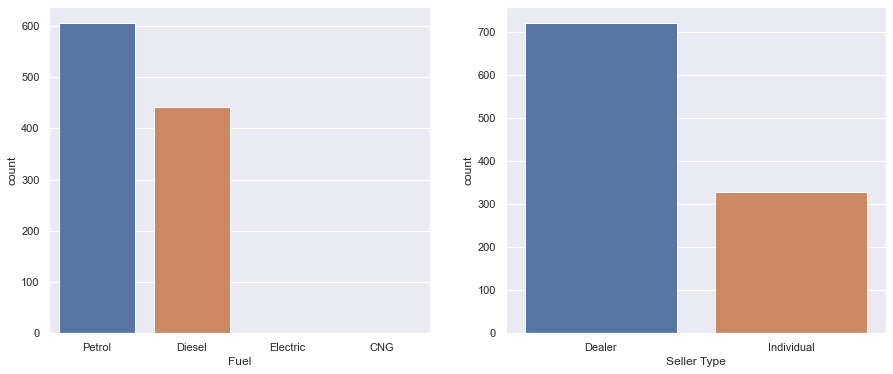

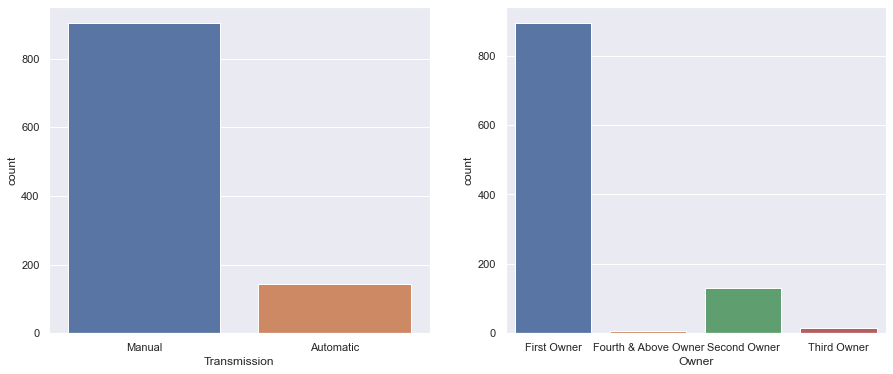

In [54]:
cat_cols = ['Fuel','Seller Type','Transmission','Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[15,6])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()


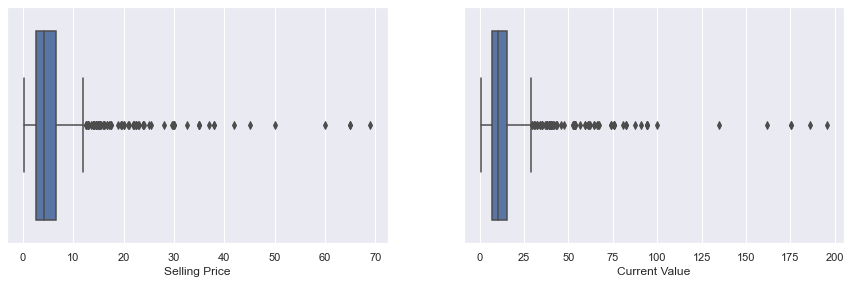

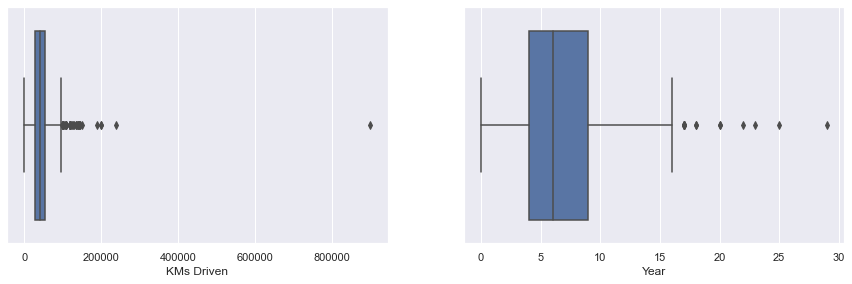

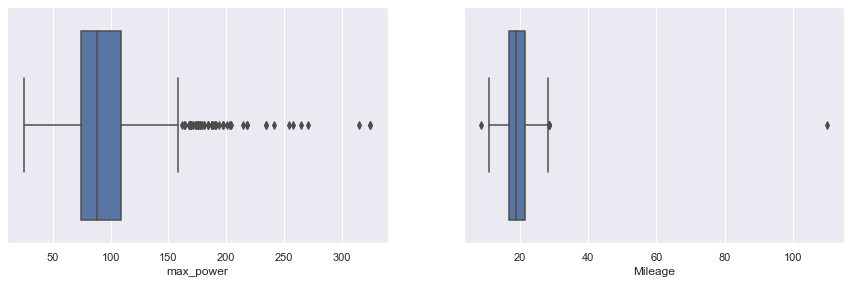

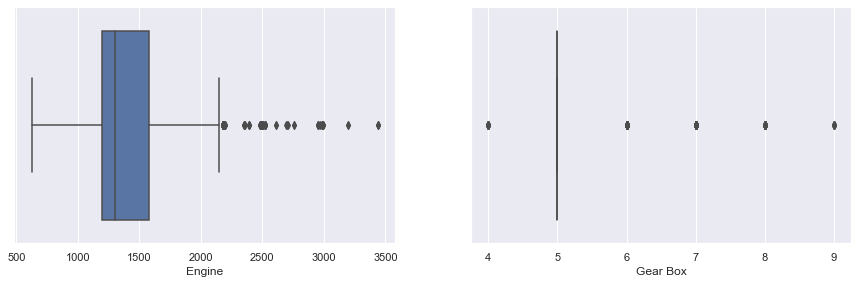

In [11]:
num_cols = ['Selling Price','Current Value','KMs Driven','Year','max_power','Mileage','Engine','Gear Box']
i=0
while i < 8:
    fig = plt.figure(figsize=[15,20])
    plt.subplot(4,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    plt.subplot(4,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    

## Bivariate Analysis

<AxesSubplot:>

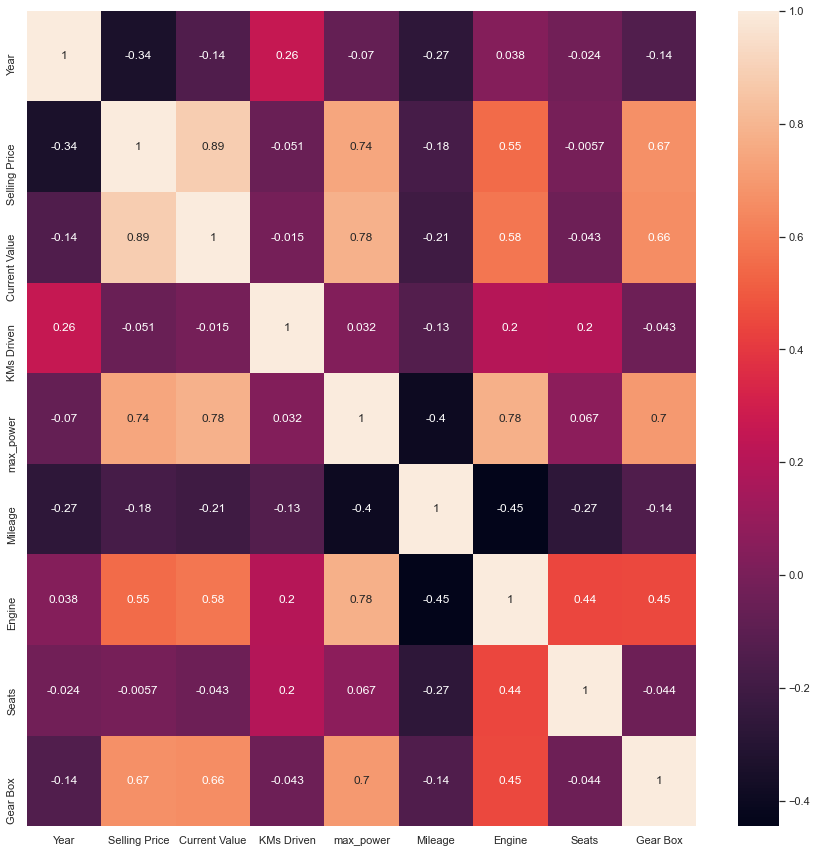

In [12]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(),annot=True)

In [13]:
print(df['Fuel'].value_counts(),'\n')
print(df['Seller Type'].value_counts(),'\n')
print(df['Transmission'].value_counts(),'\n')
print(df['Owner'].value_counts(),'\n')

Petrol      606
Diesel      442
Electric      1
CNG           1
Name: Fuel, dtype: int64 

Dealer        722
Individual    328
Name: Seller Type, dtype: int64 

Manual       905
Automatic    145
Name: Transmission, dtype: int64 

First Owner             895
Second Owner            131
Third Owner              16
Fourth & Above Owner      8
Name: Owner, dtype: int64 



In [14]:
df.pivot_table(values='Selling Price', index = 'Seller Type', columns= 'Fuel')

Fuel,CNG,Diesel,Electric,Petrol
Seller Type,,,,
Dealer,NaN,8.339061,3.99,4.943789
Individual,1.65,7.086241,NaN,3.279940


# Data Preparation

## Creating Dummies for Categorical Features

In [15]:
label_encoder = LabelEncoder()
df['Owner']= label_encoder.fit_transform(df['Owner'])

In [16]:
final_dataset=df[['Year','Selling Price','Current Value','KMs Driven','Fuel',
                  'Seller Type','max_power','Transmission','Owner','Mileage','Engine','Seats','Gear Box']]

In [17]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

<AxesSubplot:>

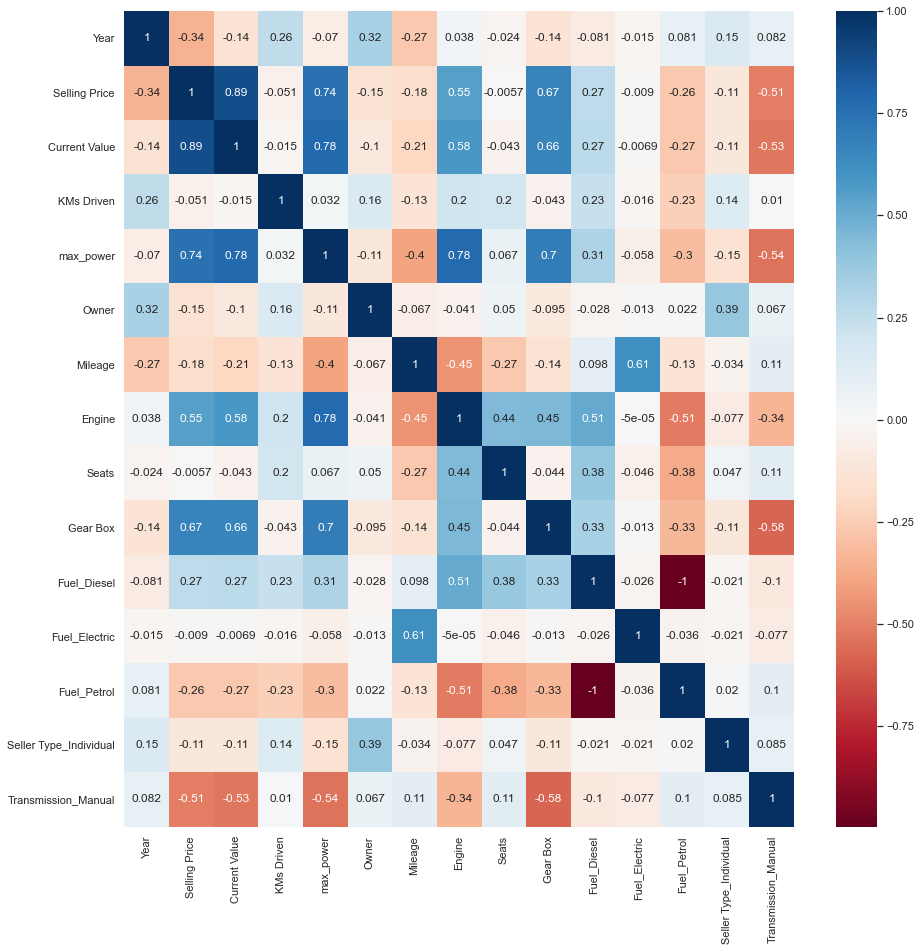

In [18]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(final_dataset.corr(),annot=True,cmap="RdBu")

In [69]:
final_dataset.corr()['Selling Price'].sort_values(ascending=False)

Selling Price             1.000000
Current Value             0.885046
max_power                 0.744582
Gear Box                  0.668597
Engine                    0.550832
Fuel_Diesel               0.266315
Seats                    -0.005690
Fuel_Electric            -0.008959
KMs Driven               -0.050787
Seller Type_Individual   -0.110876
Owner                    -0.145551
Mileage                  -0.175731
Fuel_Petrol              -0.264349
Year                     -0.343866
Transmission_Manual      -0.506135
Name: Selling Price, dtype: float64

In [27]:
y = final_dataset['Selling Price']
X = final_dataset.drop('Selling Price',axis=1)

## Feature Importance

In [28]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [29]:
print(model.feature_importances_)

[1.00727101e-01 4.54874134e-01 1.46965566e-02 1.04696153e-01
 2.05634981e-03 7.69684617e-03 4.27790659e-02 9.61168352e-02
 1.14777042e-01 1.01498910e-02 2.35535683e-06 3.42311824e-03
 7.75940956e-03 4.02451420e-02]


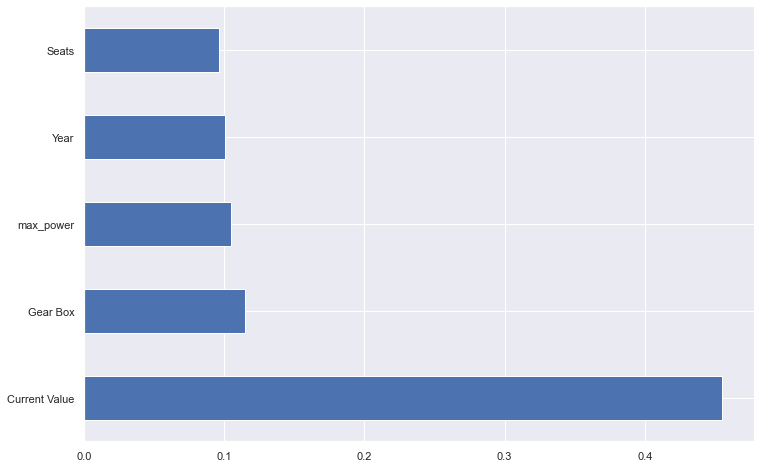

In [30]:
sns.set(rc={'figure.figsize':(12,8)})

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (735, 14)
x test:  (315, 14)
y train:  (735,)
y test:  (315,)


In [32]:
CV = []
R2_train = []
R2_test = []
MAE=[]
MSE=[]
RMSE=[]

def car_pred_model(model):
    
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    MAE.append(metrics.mean_absolute_error(y_test, y_pred_test))
    MSE.append(metrics.mean_squared_error(y_test, y_pred_test))
    RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    
    
    fig, ax = plt.subplots(1,2,figsize = (12,6))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_test-y_pred_test),hist = True,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

## Linear Regression

Train R2-score : 0.83
Test R2-score : 0.88
Train CV scores : [0.87318862 0.23054545 0.81581846 0.86005821 0.79216413]
Train CV mean : 0.71
MAE: 1.3212115374204905
MSE: 5.731984478802555
RMSE: 2.3941563187900985


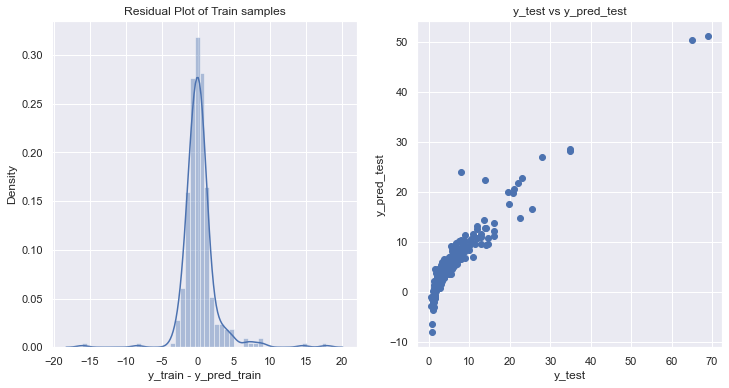

In [33]:

lr = LinearRegression()
lr.fit(X_train,y_train)

car_pred_model(lr)

## Ridge

Train R2-score : 0.83
Test R2-score : 0.89
Train CV scores : [0.87345385 0.19438248 0.81973301 0.87546861 0.79190635]
Train CV mean : 0.71
MAE: 1.259204342611868
MSE: 5.417232953632579
RMSE: 2.327494995404411


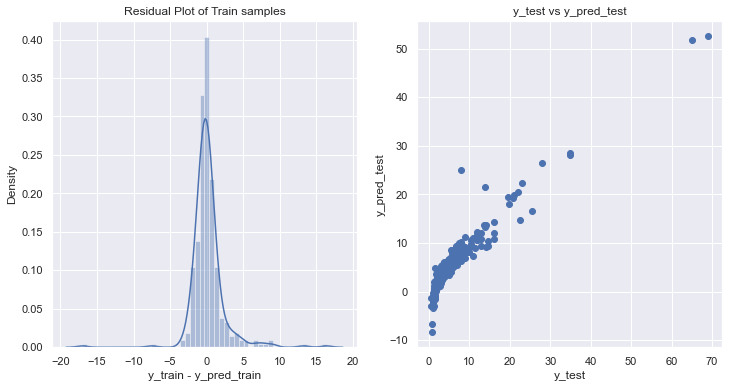

In [34]:

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

rg_rs.fit(X_train,y_train)

car_pred_model(rg_rs)

## Lasso

Train R2-score : 0.83
Test R2-score : 0.88
Train CV scores : [0.87434025 0.22872808 0.82137491 0.87579026 0.79292455]
Train CV mean : 0.72
MAE: 1.28454046198753
MSE: 5.66135888360262
RMSE: 2.379361024225332


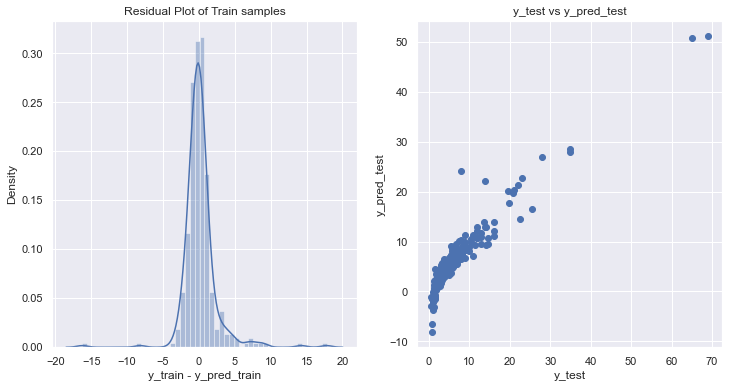

In [35]:

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

ls_rs.fit(X_train,y_train)
car_pred_model(ls_rs)

## Random Forest

In [36]:

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,cv = 5, random_state=42, n_jobs = 1)
rf_rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [4, 8],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7],
                                        'min_samples_split': [4, 6, 8],
                                        'n_estimators': [500, 600, 700, 800,
                                                         900]},
                   random_state=42)

Train R2-score : 0.96
Test R2-score : 0.92
Train CV scores : [0.90932922 0.55268803 0.77245254 0.92139404 0.90756667]
Train CV mean : 0.81
MAE: 0.796357939896497
MSE: 3.7897916295929766
RMSE: 1.9467387163132541


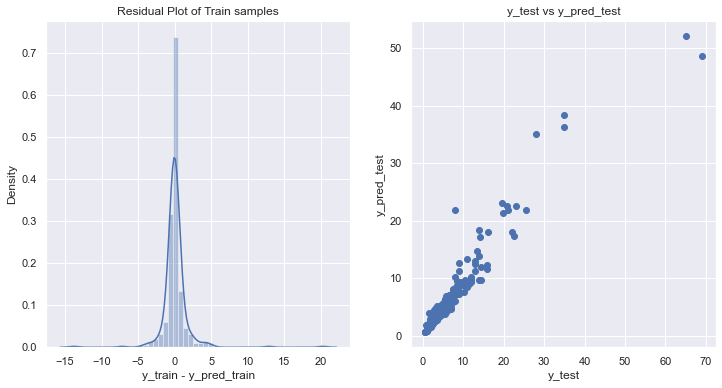

In [37]:
car_pred_model(rf_rs)

## Gradient Boosting

Train R2-score : 0.98
Test R2-score : 0.92
Train CV scores : [0.92462522 0.54253837 0.79010633 0.94300397 0.92394372]
Train CV mean : 0.82
MAE: 0.8893903439168446
MSE: 3.6312438716414492
RMSE: 1.905582292015081


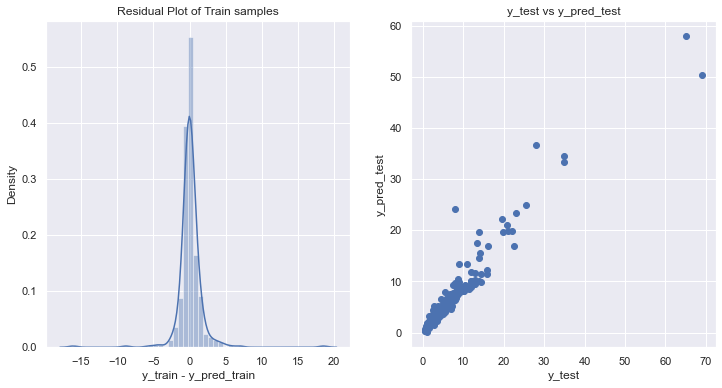

In [38]:

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid,cv = 5, random_state=42, n_jobs = 1)

gb_rs.fit(X_train,y_train)

car_pred_model(gb_rs)

In [39]:
gb_rs.best_params_

{'n_estimators': 900,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 4,
 'learning_rate': 0.01}

In [41]:
gb_rs.best_score_

0.8700772287866136

In [42]:
Models = ["Linear Regression","Ridge","Lasso","RandomForest Regressor","GradientBoosting Regressor"]

score_comparison=pd.DataFrame({'Model': Models,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV,
                     'Mean Absolute Error':MAE,'Mean Squared Error':MSE, 'Root Mean Squared Error':RMSE})


In [43]:
score_comparison

,Model,R Squared(Train),R Squared(Test),CV score mean(Train),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.83,0.88,0.71,1.321212,5.731984,2.394156
1,Ridge,0.83,0.89,0.71,1.259204,5.417233,2.327495
2,Lasso,0.83,0.88,0.72,1.284540,5.661359,2.379361
3,RandomForest Regressor,0.96,0.92,0.81,0.796358,3.789792,1.946739
4,GradientBoosting Regressor,0.98,0.92,0.82,0.889390,3.631244,1.905582


In [44]:
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_rs, file)